# 환경 변수 및 패키지 설치

In [1]:
!pip install cmake opencv-python
!conda install -y dlib

Channels:
 - conda-forge
Platform: linux-64
Solving environment: done

# All requested packages already installed.



In [1]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리
print("🌫🛸")

🌫🛸


In [41]:
print(cv2.__version__)
print(dlib.__version__)

4.12.0
20.0.0


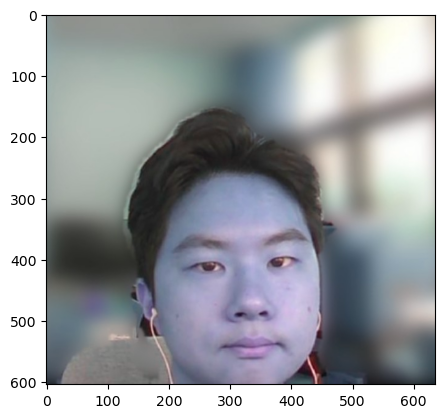

In [42]:
# 경로 설정
home_dir = os.getenv('HOME')
my_image_path = os.path.join(home_dir, 'work/camera_sticker/images/myface.png') # 내 얼굴 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러온다.
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관하기
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다.
plt.show() # 이미지를 출력해준다. (실제 출력)

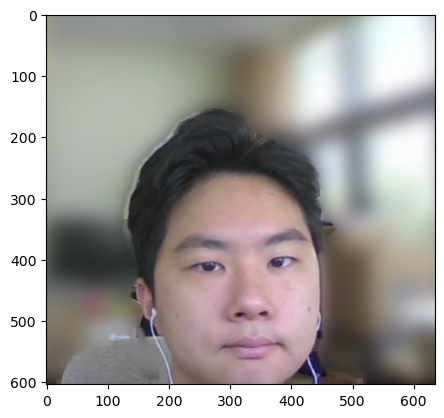

In [43]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # brg 이미지를 rgb로 바꾸어준다.
plt.imshow(img_rgb)
plt.show() # 이미지 실제 출력

In [44]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

🌫🛸


In [45]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(200, 320) (468, 587)]]


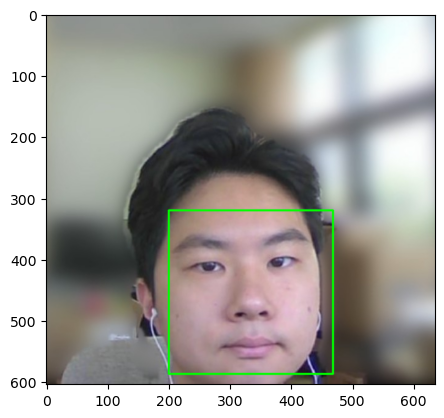

In [46]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있다.
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [47]:
model_path = os.path.join(home_dir, 'work/camera_sticker/models/shape_predictor_68_face_landmarks.dat')
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장

landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [48]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


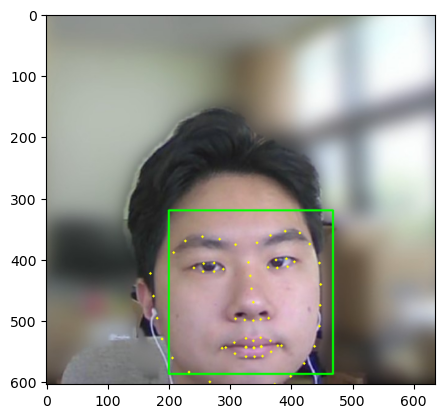

In [49]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [50]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코 끝의 index는 33 입니다
    
    x = landmark[33][0] # 이미지에서 코 끝 부위의 x값
    
    y = landmark[33][1] + dlib_rect.height()*2//5# 이미지에서 코 끝 부위에서 서서히 이동시키면서 실험적으로 적절한 값을 찾았다.
    
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(338, 500)
(x,y) : (338,607)
(w,h) : (269,269)


In [51]:
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat-whiskers.png') # 고양이 수염 이미지의 경로
# ✅ 스티커 PNG 읽기

img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED).astype(np.float32)
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수

print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(269, 269, 4)


In [52]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임

refined_x = x - w *2// 5 # 
refined_y = y - h #

# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 수염 이미지가 시작됨

print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (204,338)


In [53]:
# 수염 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함

# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)

# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 스티커 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.

if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

# 수염 이미지를 씌우기 위해 수염 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (204,338)


In [54]:
# ✅ 좌표 계산
h_sticker, w_sticker = img_sticker.shape[:2]
h_img, w_img = img_show.shape[:2]

x1, y1 = refined_x, refined_y
x2, y2 = x1 + w_sticker, y1 + h_sticker

# ✅ 이미지 범위 넘어가는 부분 클리핑
x1_clip = max(0, x1)
y1_clip = max(0, y1)
x2_clip = min(w_img, x2)
y2_clip = min(h_img, y2)

# ✅ 스티커도 똑같이 자르기 (clip 좌표 기준)
sticker_crop = img_sticker[
    (y1_clip - y1):(y2_clip - y1),
    (x1_clip - x1):(x2_clip - x1)
]

# ✅ 대상 이미지 영역도 같은 크기로 추출
sticker_area = img_show[y1_clip:y2_clip, x1_clip:x2_clip].astype(np.float32)

# ✅ RGB & 알파 분리
sticker_rgb = sticker_crop[:, :, :3].astype(np.float32)
sticker_alpha = sticker_crop[:, :, 3] / 255.0
sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2)

# ✅ 알파 블렌딩 (이제 shape 동일)
blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)

# ✅ 결과 합성
img_show[y1_clip:y2_clip, x1_clip:x2_clip] = blended


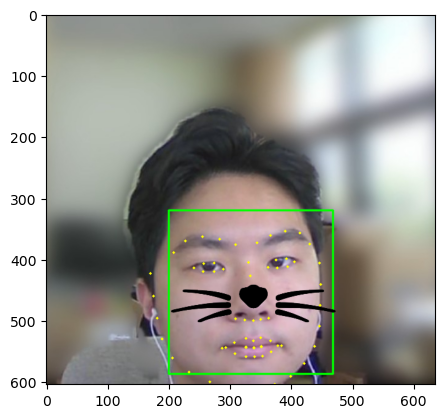

In [55]:
# 수염 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 스티커이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 최종 이미지 저장하기

랜드마크와 얼굴 영역을 제거한 이미지를 출력한다.

In [56]:
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다

# ✅ 좌표 계산
h_sticker, w_sticker = img_sticker.shape[:2]
h_img, w_img = img_show.shape[:2]

x1, y1 = refined_x, refined_y
x2, y2 = x1 + w_sticker, y1 + h_sticker

# ✅ 이미지 범위 넘어가는 부분 클리핑
x1_clip = max(0, x1)
y1_clip = max(0, y1)
x2_clip = min(w_img, x2)
y2_clip = min(h_img, y2)

# ✅ 스티커도 똑같이 자르기 (clip 좌표 기준)
sticker_crop = img_sticker[
    (y1_clip - y1):(y2_clip - y1),
    (x1_clip - x1):(x2_clip - x1)
]

# ✅ 대상 이미지 영역도 같은 크기로 추출
sticker_area = img_show[y1_clip:y2_clip, x1_clip:x2_clip].astype(np.float32)

# ✅ RGB & 알파 분리
sticker_rgb = sticker_crop[:, :, :3].astype(np.float32)
sticker_alpha = sticker_crop[:, :, 3] / 255.0
sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2)

# ✅ 알파 블렌딩 (이제 shape 동일)
blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)

# ✅ 결과 합성
img_show[y1_clip:y2_clip, x1_clip:x2_clip] = blended


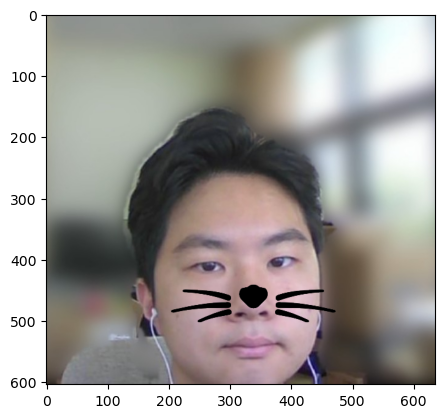

In [57]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 다양한 변수에 따른 영향도


얼굴 각도, 이미지 밝기, 촬영 거리 등에 따른 영향도를 분석하기

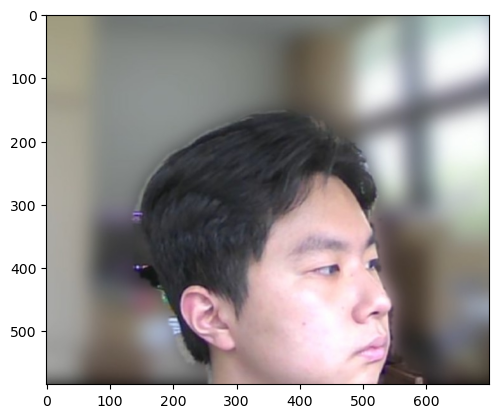

In [76]:
# 왼쪽 얼굴

my_image_path = os.path.join(home_dir, 'work/camera_sticker/images/left_face.png') # 내 얼굴 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러온다.
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관하기

# rgb로 변경
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # brg 이미지를 rgb로 바꾸어준다.
plt.imshow(img_rgb)
plt.show() # 이미지를 출력해준다. (실제 출력)

🌫🛸
rectangles[[(312, 277) (633, 598)]]


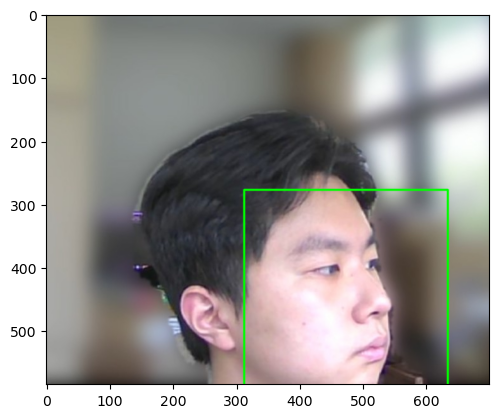

In [77]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있다.
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [78]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


In [79]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코 끝의 index는 33 입니다
    
    x = landmark[33][0] # 이미지에서 코 끝 부위의 x값
    
    y = landmark[33][1] + dlib_rect.height()*2//5# 이미지에서 코 끝 부위에서 서서히 이동시키면서 실험적으로 적절한 값을 찾았다.
    
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(531, 480)
(x,y) : (531,608)
(w,h) : (322,322)


In [80]:
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat-whiskers.png') # 고양이 수염 이미지의 경로
# ✅ 스티커 PNG 읽기

img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED).astype(np.float32)
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수

print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(322, 322, 4)


In [81]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임

refined_x = x - w *2// 5 # 
refined_y = y - h #

# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 수염 이미지가 시작됨

print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (403,286)


In [82]:
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

# 수염 이미지를 씌우기 위해 수염 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (403,286)


In [83]:
# ✅ 좌표 계산
h_sticker, w_sticker = img_sticker.shape[:2]
h_img, w_img = img_show.shape[:2]

x1, y1 = refined_x, refined_y
x2, y2 = x1 + w_sticker, y1 + h_sticker

# ✅ 이미지 범위 넘어가는 부분 클리핑
x1_clip = max(0, x1)
y1_clip = max(0, y1)
x2_clip = min(w_img, x2)
y2_clip = min(h_img, y2)

# ✅ 스티커도 똑같이 자르기 (clip 좌표 기준)
sticker_crop = img_sticker[
    (y1_clip - y1):(y2_clip - y1),
    (x1_clip - x1):(x2_clip - x1)
]

# ✅ 대상 이미지 영역도 같은 크기로 추출
sticker_area = img_show[y1_clip:y2_clip, x1_clip:x2_clip].astype(np.float32)

# ✅ RGB & 알파 분리
sticker_rgb = sticker_crop[:, :, :3].astype(np.float32)
sticker_alpha = sticker_crop[:, :, 3] / 255.0
sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2)

# ✅ 알파 블렌딩 (이제 shape 동일)
blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)

# ✅ 결과 합성
img_show[y1_clip:y2_clip, x1_clip:x2_clip] = blended

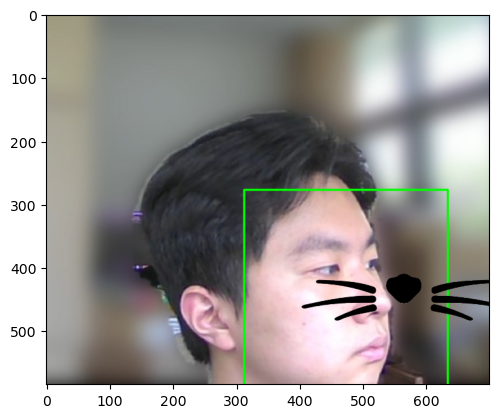

In [84]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

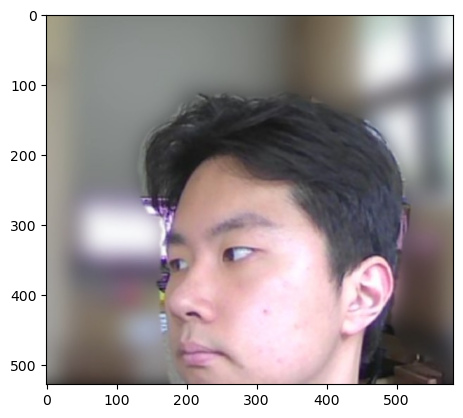

In [86]:
# 오른쪽 얼굴

my_image_path = os.path.join(home_dir, 'work/camera_sticker/images/right_face.png') # 내 얼굴 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러온다.
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관하기

# rgb로 변경
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # brg 이미지를 rgb로 바꾸어준다.
plt.imshow(img_rgb)
plt.show() # 이미지를 출력해준다. (실제 출력)

🌫🛸
rectangles[[(111, 260) (379, 528)]]


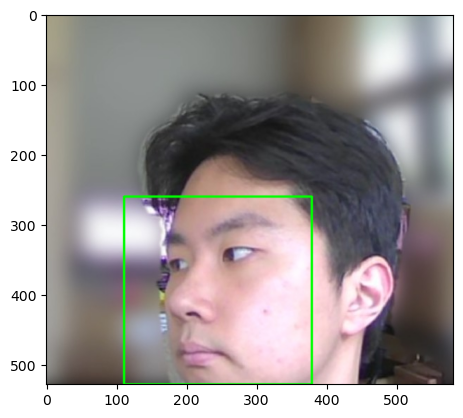

In [87]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있다.
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [88]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


In [89]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코 끝의 index는 33 입니다
    
    x = landmark[33][0] # 이미지에서 코 끝 부위의 x값
    
    y = landmark[33][1] + dlib_rect.height()*2//5# 이미지에서 코 끝 부위에서 서서히 이동시키면서 실험적으로 적절한 값을 찾았다.
    
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(203, 439)
(x,y) : (203,546)
(w,h) : (269,269)


In [90]:
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat-whiskers.png') # 고양이 수염 이미지의 경로
# ✅ 스티커 PNG 읽기

img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED).astype(np.float32)
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수

print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(269, 269, 4)


In [91]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임

refined_x = x - w *2// 5 # 
refined_y = y - h #

# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 수염 이미지가 시작됨

print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남

# 수염 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함

# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)

# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

# 수염 이미지를 씌우기 위해 수염 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (96,277)
(x,y) : (96,277)


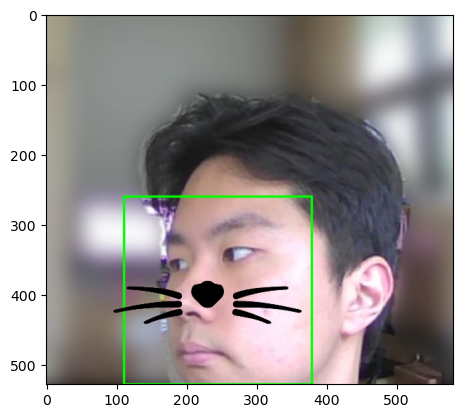

In [92]:
# ✅ 좌표 계산
h_sticker, w_sticker = img_sticker.shape[:2]
h_img, w_img = img_show.shape[:2]

x1, y1 = refined_x, refined_y
x2, y2 = x1 + w_sticker, y1 + h_sticker

# ✅ 이미지 범위 넘어가는 부분 클리핑
x1_clip = max(0, x1)
y1_clip = max(0, y1)
x2_clip = min(w_img, x2)
y2_clip = min(h_img, y2)

# ✅ 스티커도 똑같이 자르기 (clip 좌표 기준)
sticker_crop = img_sticker[
    (y1_clip - y1):(y2_clip - y1),
    (x1_clip - x1):(x2_clip - x1)
]

# ✅ 대상 이미지 영역도 같은 크기로 추출
sticker_area = img_show[y1_clip:y2_clip, x1_clip:x2_clip].astype(np.float32)

# ✅ RGB & 알파 분리
sticker_rgb = sticker_crop[:, :, :3].astype(np.float32)
sticker_alpha = sticker_crop[:, :, 3] / 255.0
sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2)

# ✅ 알파 블렌딩 (이제 shape 동일)
blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)

# ✅ 결과 합성
img_show[y1_clip:y2_clip, x1_clip:x2_clip] = blended

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

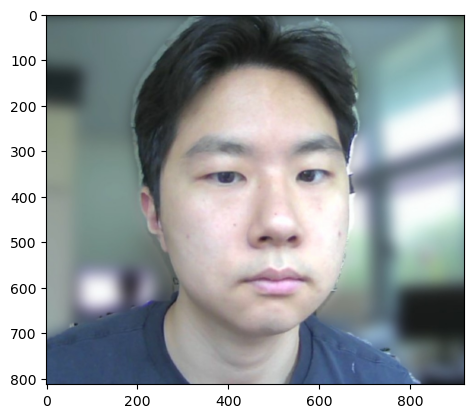

In [93]:
# 가까운 얼굴

my_image_path = os.path.join(home_dir, 'work/camera_sticker/images/close.png') # 내 얼굴 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러온다.
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관하기

# rgb로 변경
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # brg 이미지를 rgb로 바꾸어준다.
plt.imshow(img_rgb)
plt.show() # 이미지를 출력해준다. (실제 출력)

🌫🛸
rectangles[[(245, 246) (707, 708)]]


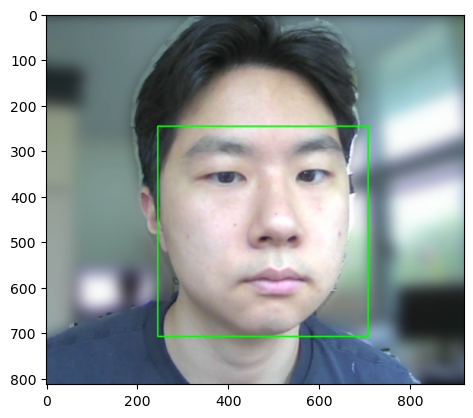

In [94]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있다.
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [95]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


In [96]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코 끝의 index는 33 입니다
    
    x = landmark[33][0] # 이미지에서 코 끝 부위의 x값
    
    y = landmark[33][1] + dlib_rect.height()*2//5# 이미지에서 코 끝 부위에서 서서히 이동시키면서 실험적으로 적절한 값을 찾았다.
    
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(513, 513)
(x,y) : (513,698)
(w,h) : (463,463)


In [97]:
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat-whiskers.png') # 고양이 수염 이미지의 경로
# ✅ 스티커 PNG 읽기

img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED).astype(np.float32)
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수

print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(463, 463, 4)


In [98]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임

refined_x = x - w *2// 5 # 
refined_y = y - h #

# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 수염 이미지가 시작됨

print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남

# 수염 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함

# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)

# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.

if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

# 수염 이미지를 씌우기 위해 수염 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (328,235)
(x,y) : (328,235)


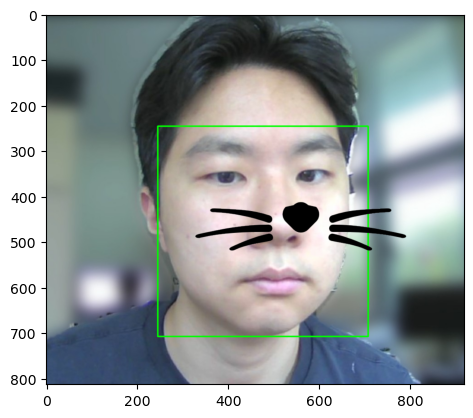

In [99]:
# ✅ 좌표 계산
h_sticker, w_sticker = img_sticker.shape[:2]
h_img, w_img = img_show.shape[:2]

x1, y1 = refined_x, refined_y
x2, y2 = x1 + w_sticker, y1 + h_sticker

# ✅ 이미지 범위 넘어가는 부분 클리핑
x1_clip = max(0, x1)
y1_clip = max(0, y1)
x2_clip = min(w_img, x2)
y2_clip = min(h_img, y2)

# ✅ 스티커도 똑같이 자르기 (clip 좌표 기준)
sticker_crop = img_sticker[
    (y1_clip - y1):(y2_clip - y1),
    (x1_clip - x1):(x2_clip - x1)
]

# ✅ 대상 이미지 영역도 같은 크기로 추출
sticker_area = img_show[y1_clip:y2_clip, x1_clip:x2_clip].astype(np.float32)

# ✅ RGB & 알파 분리
sticker_rgb = sticker_crop[:, :, :3].astype(np.float32)
sticker_alpha = sticker_crop[:, :, 3] / 255.0
sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2)

# ✅ 알파 블렌딩 (이제 shape 동일)
blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)

# ✅ 결과 합성
img_show[y1_clip:y2_clip, x1_clip:x2_clip] = blended

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

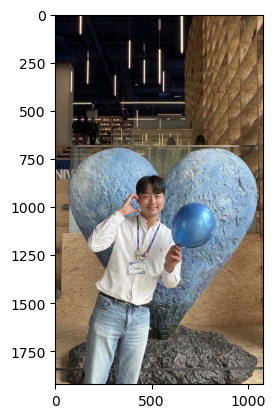

In [100]:
# 멀고 사물 많은 얼굴

my_image_path = os.path.join(home_dir, 'work/camera_sticker/images/friend.png') # 내 얼굴 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러온다.
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관하기

# rgb로 변경
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # brg 이미지를 rgb로 바꾸어준다.
plt.imshow(img_rgb)
plt.show() # 이미지를 출력해준다. (실제 출력)

🌫🛸
rectangles[[(440, 913) (569, 1042)]]


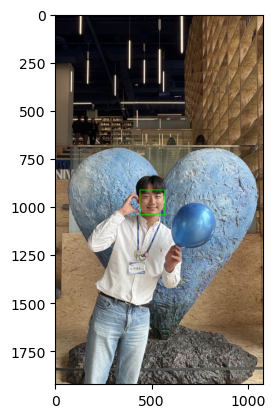

In [101]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있다.
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [102]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


In [103]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코 끝의 index는 33 입니다
    
    x = landmark[33][0] # 이미지에서 코 끝 부위의 x값
    
    y = landmark[33][1] + dlib_rect.height()*2//5# 이미지에서 코 끝 부위에서 서서히 이동시키면서 실험적으로 적절한 값을 찾았다.
    
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(506, 992)
(x,y) : (506,1044)
(w,h) : (130,130)


In [104]:
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat-whiskers.png') # 고양이 수염 이미지의 경로
# ✅ 스티커 PNG 읽기

img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED).astype(np.float32)
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수

print (img_sticker.shape) # 사이즈를 조정한 수염 이미지의 차원 확인

(130, 130, 4)


In [105]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임

refined_x = x - w *2// 5 # 
refined_y = y - h #

# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 수염 이미지가 시작됨

print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남


# 수염 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함

# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)

# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

# 수염 이미지를 씌우기 위해 수염 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (454,914)
(x,y) : (454,914)


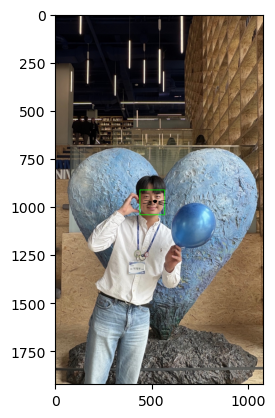

In [106]:
# ✅ 좌표 계산
h_sticker, w_sticker = img_sticker.shape[:2]
h_img, w_img = img_show.shape[:2]

x1, y1 = refined_x, refined_y
x2, y2 = x1 + w_sticker, y1 + h_sticker

# ✅ 이미지 범위 넘어가는 부분 클리핑
x1_clip = max(0, x1)
y1_clip = max(0, y1)
x2_clip = min(w_img, x2)
y2_clip = min(h_img, y2)

# ✅ 스티커도 똑같이 자르기 (clip 좌표 기준)
sticker_crop = img_sticker[
    (y1_clip - y1):(y2_clip - y1),
    (x1_clip - x1):(x2_clip - x1)
]

# ✅ 대상 이미지 영역도 같은 크기로 추출
sticker_area = img_show[y1_clip:y2_clip, x1_clip:x2_clip].astype(np.float32)

# ✅ RGB & 알파 분리
sticker_rgb = sticker_crop[:, :, :3].astype(np.float32)
sticker_alpha = sticker_crop[:, :, 3] / 255.0
sticker_alpha = np.repeat(sticker_alpha[:, :, np.newaxis], 3, axis=2)

# ✅ 알파 블렌딩 (이제 shape 동일)
blended = (sticker_alpha * sticker_rgb + (1 - sticker_alpha) * sticker_area).astype(np.uint8)

# ✅ 결과 합성
img_show[y1_clip:y2_clip, x1_clip:x2_clip] = blended

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

좌, 우, 가까운, 멀리 있는 얼굴을 했을 때도 얼굴 박스는 잘 인식하지만, 코 스티커는 제대로 위치하지 않는다.

생각나는 해결방안: 랜드마크 기반으로 적정한 위치를 학습하는 모델을 만든다면, 얼굴 방향과 관계없이 적절한 위치에 스티커를 위치시킬 수 있을 것이다.